## IE 345 - K “Introduction to Deep Learning: Fundamentals Concepts” 
#### Resolution of the first example of the book Deep Learning with Python.
##### pg. 68 - 74

In [2]:
import keras
from keras.datasets import reuters
import numpy as np

Using TensorFlow backend.


In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')
print('Train_data shape', train_data.shape)
print('Test_data shape', test_data.shape)
print('Train_labels shape', train_labels.shape)
print('Test_labels shape', test_labels.shape)

8982 train sequences
2246 test sequences
Train_data shape (8982,)
Test_data shape (2246,)
Train_labels shape (8982,)
Test_labels shape (2246,)


In [5]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for(key,value) in word_index.items()])
decoder_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print('Decoder newswire: ', decoder_newswire)
print('Train_labels 0: ', train_labels[0])

Decoder newswire:  ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Train_labels 0:  3


In [7]:
num_classes = np.max(train_labels) + 1
print(num_classes, 'classes')

46 classes


In [8]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
train_data=tokenizer.sequences_to_matrix(train_data, mode='binary')
test_data=tokenizer.sequences_to_matrix(test_data, mode='binary')
print('Train_data shape: ', train_data.shape)
print('Test_data shape: ', test_data.shape)

Train_data shape:  (8982, 10000)
Test_data shape:  (2246, 10000)


In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels, num_classes)
one_hot_test_labels = to_categorical(test_labels, num_classes)
print('One hot train labels', one_hot_train_labels.shape)
print('One hot test labels', one_hot_test_labels.shape)

One hot train labels (8982, 46)
One hot test labels (2246, 46)


In [10]:
from keras import models, regularizers, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_data, one_hot_train_labels, 
                    batch_size=512,
                    epochs=40,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/40
8083/8083 [==============================] - 3s 322us/step - loss: 2.5390 - acc: 0.4842 - val_loss: 1.8126 - val_acc: 0.6107
Epoch 2/40
8083/8083 [==============================] - 2s 244us/step - loss: 1.4388 - acc: 0.6879 - val_loss: 1.4359 - val_acc: 0.6841
Epoch 3/40
8083/8083 [==============================] - 2s 248us/step - loss: 1.0857 - acc: 0.7669 - val_loss: 1.2752 - val_acc: 0.7186
Epoch 4/40
8083/8083 [==============================] - 2s 264us/step - loss: 0.8621 - acc: 0.8170 - val_loss: 1.1681 - val_acc: 0.7486
Epoch 5/40
8083/8083 [==============================] - 2s 236us/step - loss: 0.6900 - acc: 0.8546 - val_loss: 1.0987 - val_acc: 0.7531
Epoch 6/40
8083/8083 [==============================] - 2s 249us/step - loss: 0.5571 - acc: 0.8831 - val_loss: 1.0395 - val_acc: 0.7820
Epoch 7/40
8083/8083 [==============================] - 2s 250us/step - loss: 0.4469 - acc: 0.9072 - val_loss: 1.0036 - val_acc: 0.7887
E

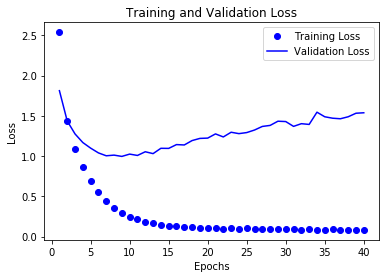

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

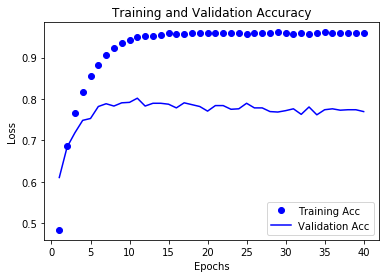

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [15]:
score = model.evaluate(test_data, one_hot_test_labels, batch_size=512, verbose=1)
print('Test accuracy', score[1])

2246/2246 [==============================] - 0s 216us/step
Test accuracy 0.7738201256745221
